In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from numpy import concatenate
from pandas import *
from sklearn.preprocessing import *
from sklearn.metrics import *
from tensorflow import keras
import tensorflow as tf
import time as t

In [45]:
w=16

In [46]:
dataFromSensors=np.load("DataWithLabels/dataFromSensors_"+str(w)+".npy")

In [47]:
np.info(dataFromSensors)

class:  ndarray
shape:  (475321, 16, 16)
strides:  (2048, 128, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x15970462040
byteorder:  little
byteswap:  False
type: float64


In [48]:
labels=np.load("DataWithLabels/labels_"+str(w)+".npy")

In [49]:
np.info(labels)

class:  ndarray
shape:  (475321,)
strides:  (8,)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x158c3a74040
byteorder:  little
byteswap:  False
type: float64


In [50]:
#values = reframed_df.values
#training_sample =int( len(dataset) *0.8)
training_sample_labels =int( len(labels) *0.8)
training_sample =int( len(dataFromSensors) *0.8)
#testDataset=DataFrame.to_numpy(dataset)
#testDataset=DataFrame.to_numpy(reframed_df)

In [51]:
training_sample_labels

380256

In [52]:
training_sample

380256

In [53]:
train_labels = labels[:training_sample]
train = dataFromSensors[:training_sample, : ,:]
test_labels = labels[training_sample:]
test = dataFromSensors[training_sample:, : , :]
# split into input and outputs
#train_X, train_y = train[:,:, 1:], train[:,:,0]
#test_X, test_y = test[:,:, 1:], test[:,:,0]
train_X, train_y = train[:,:, 1:], train_labels[:]
test_X, test_y = test[:,:, 1:], test_labels[:]

In [54]:
train_X.shape

(380256, 16, 15)

In [55]:
train_y

array([0., 0., 0., ..., 0., 0., 0.])

In [56]:
#print(train_X)

In [57]:
train_y.shape

(380256,)

In [58]:
#print(test_y)

In [59]:
train_y=train_y.reshape(train_y.shape[0],1)

In [60]:
test_y=test_y.reshape(test_y.shape[0],1)

In [61]:
#print(train_X)

In [62]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(380256, 16, 15) (380256, 1) (95065, 16, 15) (95065, 1)


In [63]:
model_gru =  keras.models.Sequential([
    keras.layers.GRU(128,return_sequences=True,input_shape=(train_X.shape[1],train_X.shape[2]),activation='relu'),
    keras.layers.GRU(units=64,return_sequences=True,activation='relu'),
    keras.layers.GRU(units=32),#activation='relu'),
    keras.layers.Dense(units=50,activation='sigmoid'),
    keras.layers.Dense(units=1,activation='sigmoid')
                        ])
model_gru.compile(loss='binary_crossentropy', optimizer='sgd',metrics=['accuracy'])

In [64]:
model_gru.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 16, 128)           55680     
                                                                 
 gru_4 (GRU)                 (None, 16, 64)            37248     
                                                                 
 gru_5 (GRU)                 (None, 32)                9408      
                                                                 
 dense_2 (Dense)             (None, 50)                1650      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 104,037
Trainable params: 104,037
Non-trainable params: 0
_________________________________________________________________


In [65]:
 start = t.time()

In [66]:
# fit network
gru_history = model_gru.fit(train_X, train_y, epochs=140,validation_data=(test_X, test_y), batch_size=128)#, shuffle=False)

Epoch 1/140
2971/2971 [==============================] - 777s 253ms/step - loss: 0.5741 - accuracy: 0.7381 - val_loss: 0.5583 - val_accuracy: 0.7531
Epoch 2/140
2971/2971 [==============================] - 729s 245ms/step - loss: 0.5698 - accuracy: 0.7393 - val_loss: 0.5524 - val_accuracy: 0.7531
Epoch 3/140
2971/2971 [==============================] - 712s 240ms/step - loss: 0.5526 - accuracy: 0.7396 - val_loss: 0.5225 - val_accuracy: 0.7533
Epoch 4/140
2971/2971 [==============================] - 713s 240ms/step - loss: 0.5179 - accuracy: 0.7414 - val_loss: 0.4907 - val_accuracy: 0.7527
Epoch 5/140
2971/2971 [==============================] - 712s 240ms/step - loss: 0.5014 - accuracy: 0.7395 - val_loss: 0.4846 - val_accuracy: 0.7516
Epoch 6/140
2971/2971 [==============================] - 711s 239ms/step - loss: 0.4958 - accuracy: 0.7419 - val_loss: 0.4810 - val_accuracy: 0.7529
Epoch 7/140
2971/2971 [==============================] - 714s 240ms/step - loss: 0.4906 - accuracy: 0.7449

2971/2971 [==============================] - 717s 241ms/step - loss: 0.4287 - accuracy: 0.7804 - val_loss: 0.4320 - val_accuracy: 0.7772
Epoch 56/140
2971/2971 [==============================] - 713s 240ms/step - loss: 0.4285 - accuracy: 0.7808 - val_loss: 0.4247 - val_accuracy: 0.7835
Epoch 57/140
2971/2971 [==============================] - 715s 241ms/step - loss: 0.4283 - accuracy: 0.7805 - val_loss: 0.4341 - val_accuracy: 0.7776
Epoch 58/140
2971/2971 [==============================] - 712s 240ms/step - loss: 0.4281 - accuracy: 0.7808 - val_loss: 0.4262 - val_accuracy: 0.7822
Epoch 59/140
2971/2971 [==============================] - 714s 240ms/step - loss: 0.4278 - accuracy: 0.7812 - val_loss: 0.4352 - val_accuracy: 0.7725
Epoch 60/140
2971/2971 [==============================] - 713s 240ms/step - loss: 0.4276 - accuracy: 0.7809 - val_loss: 0.4298 - val_accuracy: 0.7805
Epoch 61/140
2971/2971 [==============================] - 713s 240ms/step - loss: 0.4274 - accuracy: 0.7811 - val

2971/2971 [==============================] - 707s 238ms/step - loss: 0.4201 - accuracy: 0.7847 - val_loss: 0.4244 - val_accuracy: 0.7825
Epoch 110/140
2971/2971 [==============================] - 708s 238ms/step - loss: 0.4199 - accuracy: 0.7850 - val_loss: 0.4239 - val_accuracy: 0.7845
Epoch 111/140
2971/2971 [==============================] - 708s 238ms/step - loss: 0.4198 - accuracy: 0.7852 - val_loss: 0.4243 - val_accuracy: 0.7845
Epoch 112/140
2971/2971 [==============================] - 708s 238ms/step - loss: 0.4198 - accuracy: 0.7854 - val_loss: 0.4266 - val_accuracy: 0.7833
Epoch 113/140
2971/2971 [==============================] - 711s 239ms/step - loss: 0.4197 - accuracy: 0.7855 - val_loss: 0.4288 - val_accuracy: 0.7828
Epoch 114/140
2971/2971 [==============================] - 706s 238ms/step - loss: 0.4194 - accuracy: 0.7852 - val_loss: 0.4480 - val_accuracy: 0.7817
Epoch 115/140
2971/2971 [==============================] - 706s 238ms/step - loss: 0.4193 - accuracy: 0.7856

In [67]:
pred_y =  model_gru.predict(test_X)

2971/2971 [==============================] - 82s 27ms/step


In [68]:
stop=t.time()-start
print(stop)

100249.15876054764


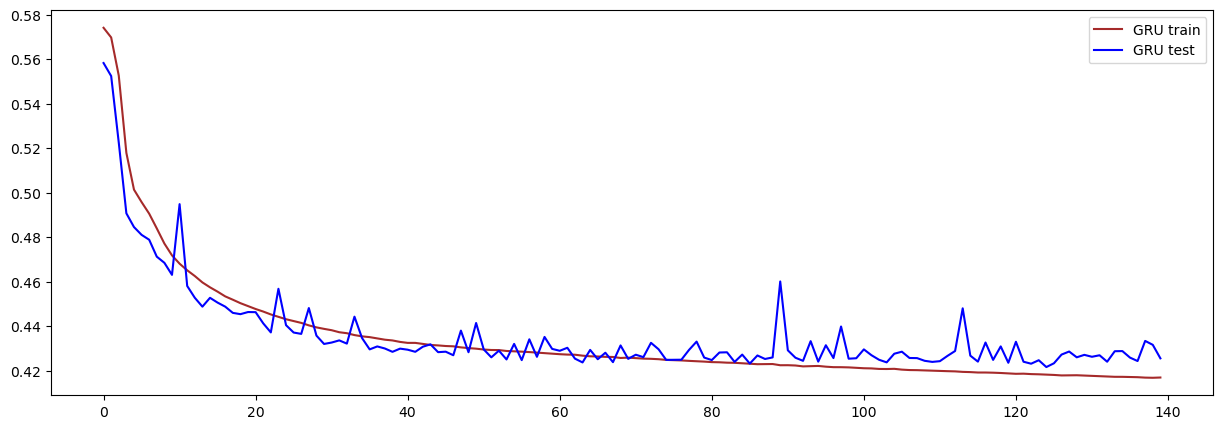

In [69]:
plt.plot(gru_history.history['loss'], label='GRU train', color='brown')
plt.plot(gru_history.history['val_loss'], label='GRU test', color='blue')
plt.legend()
plt.show()

In [70]:
print(test_y)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [71]:
np.shape(pred_y)

(95065, 1)

In [72]:
pred_y

array([[0.00913471],
       [0.00576955],
       [0.00179786],
       ...,
       [0.04709556],
       [0.05039342],
       [0.05290643]], dtype=float32)

In [73]:
pred_y=np.reshape(pred_y,95065)

0.1422128079202926
0.23526737278682175
0.3771111347073865
0.28273177889348183


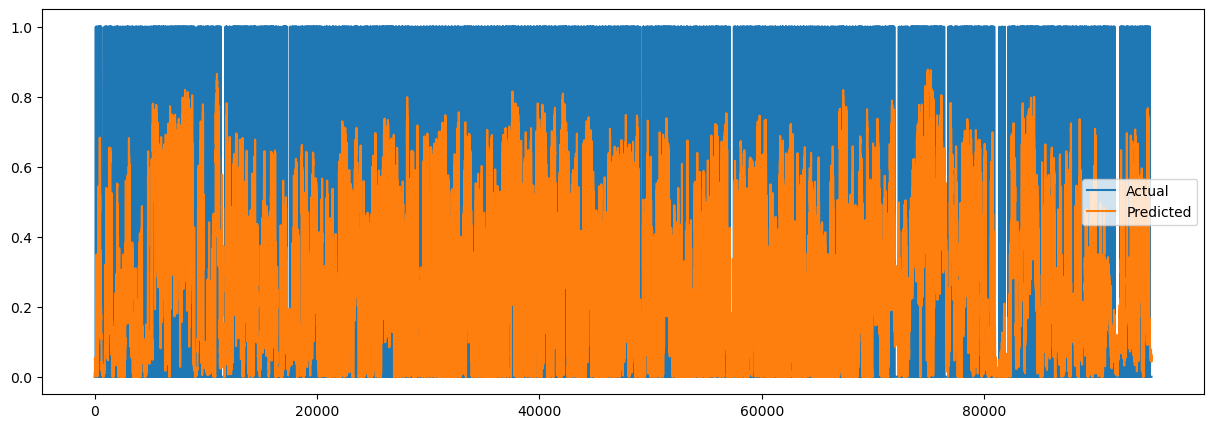

In [74]:

plt.rcParams['figure.figsize'] = (15,5)

MSE = mean_squared_error(test_y, pred_y)
R2 = r2_score(test_y, pred_y)
RMSE = sqrt(mean_squared_error(test_y, pred_y))
MAE = mean_absolute_error(test_y, pred_y)


print(MSE)
print(R2)
print(RMSE)
print(MAE)


plt.plot(test_y, label = 'Actual')
plt.plot(pred_y, label = 'Predicted')
plt.legend()
plt.show()

In [75]:
np.shape(train_X)

(380256, 16, 15)

In [76]:
np.shape(train_y)

(380256, 1)

In [77]:
np.shape(test_X)

(95065, 16, 15)

In [78]:
np.shape(test_y)

(95065, 1)

14854/14854 [==============================] - 365s 25ms/step


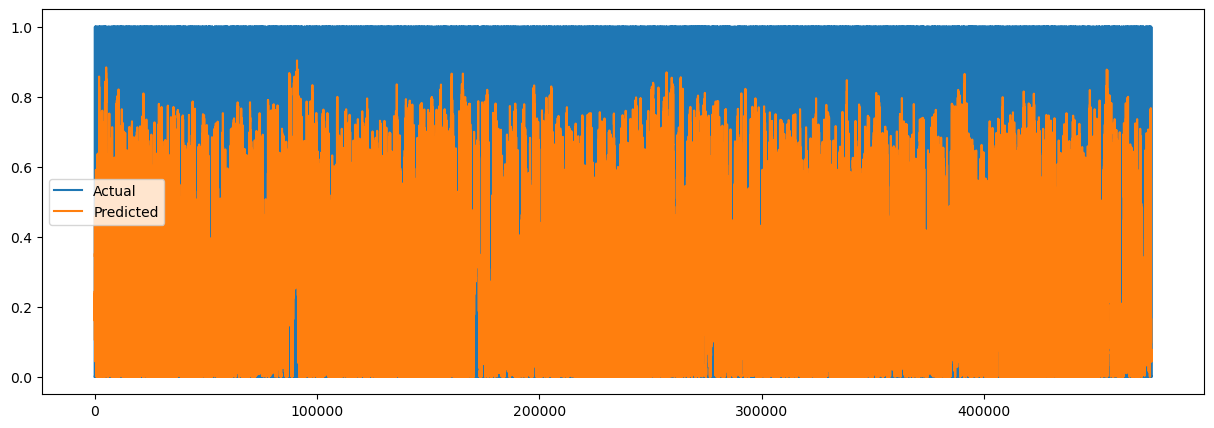

In [79]:
tra = np.concatenate([train_X,test_X])
tes = np.concatenate([train_y,test_y])
fp = model_gru.predict(tra)
plt.plot(tes, label = 'Actual')
plt.plot(fp, label = 'Predicted')
plt.legend()
plt.show()

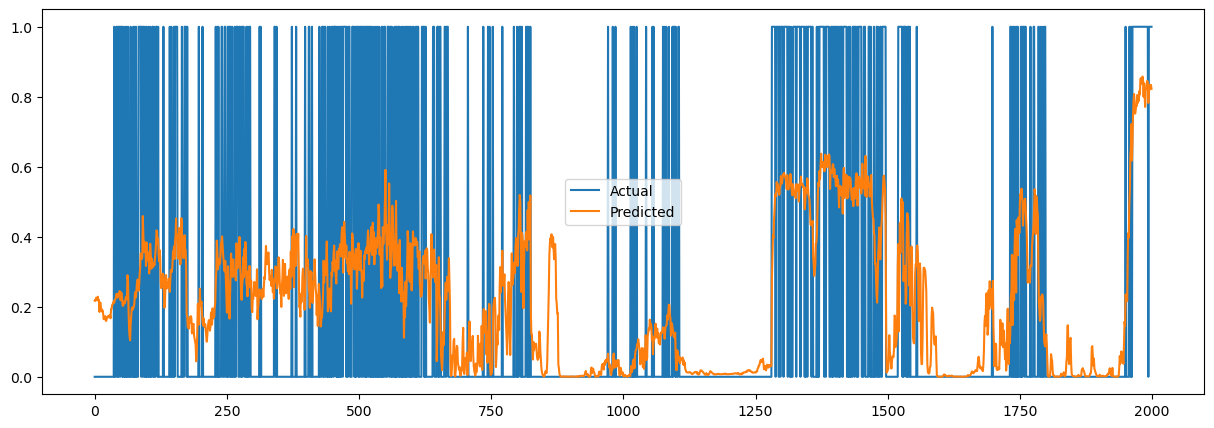

In [80]:
plt.plot(tes[:2000], label = 'Actual')
plt.plot(fp[:2000], label = 'Predicted')
plt.legend()
plt.show()

In [81]:
print(sum(tes)/len(tes))

[0.25794568]


In [82]:
#print(fp[1000:1010])
_fp = np.where(fp>0.5,1,0)
_all = sum(_fp)
_w = (_fp*tes)
print(sum(_w)/_all)
      
_all_z = sum(1-_fp)      
_w_z = (1-_fp)*(1-tes)
print(sum(_w_z)/_all_z)
print('total acc', (sum(_w)+sum(_w_z))/len(_w))

[0.62009559]
[0.82539933]
total acc [0.78699027]


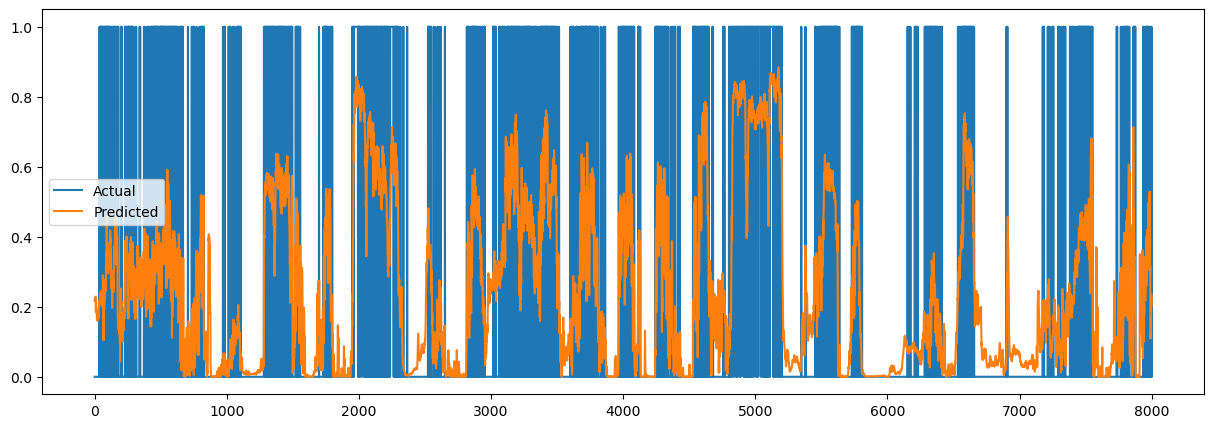

In [83]:
plt.plot(tes[:8000], label = 'Actual')
plt.plot(fp[:8000], label = 'Predicted')
plt.legend()
plt.show()

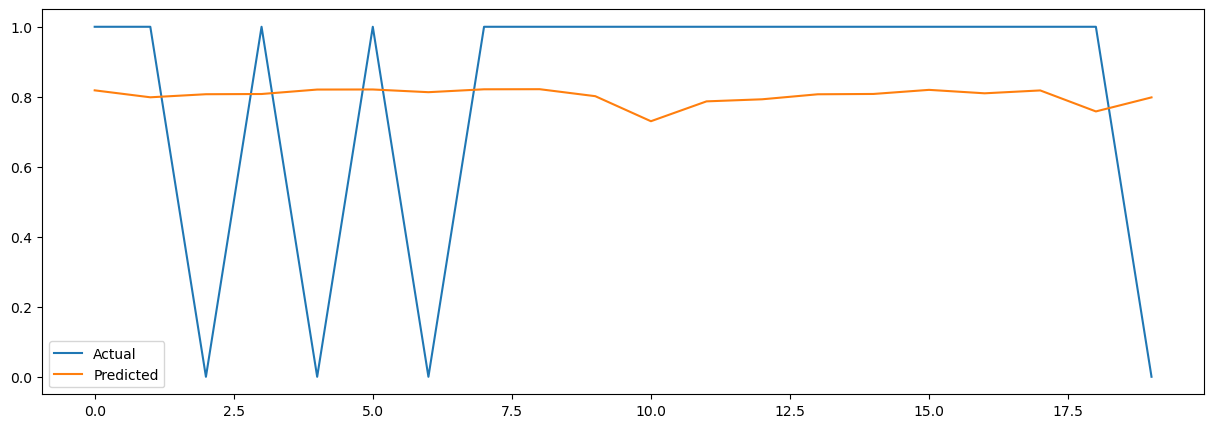

In [84]:
#over very small part of data
plt.plot(tes[2000:2020], label = 'Actual')
plt.plot(fp[2000:2020], label = 'Predicted')
plt.legend()
plt.show()

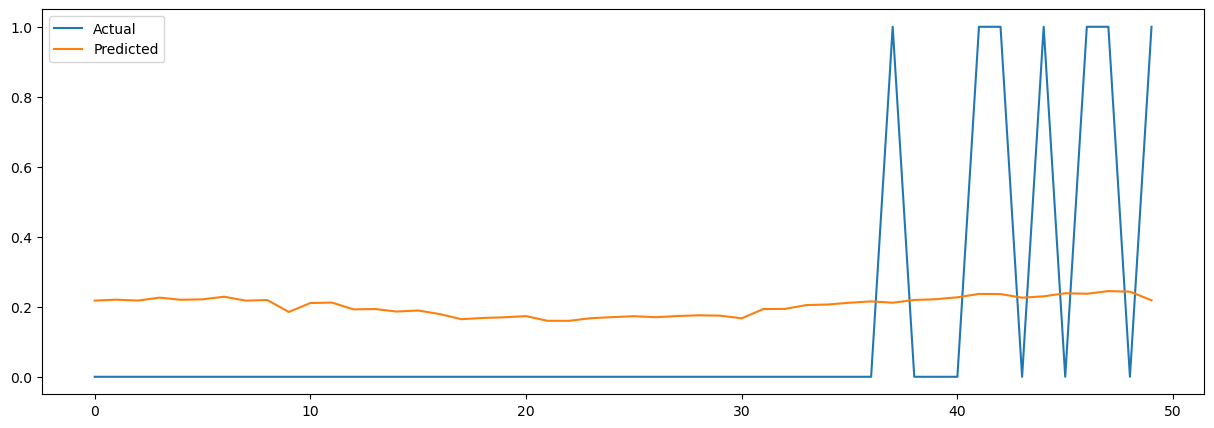

In [85]:
plt.plot(tes[:50], label = 'Actual')
plt.plot(fp[:50], label = 'Predicted')
plt.legend()
plt.show()

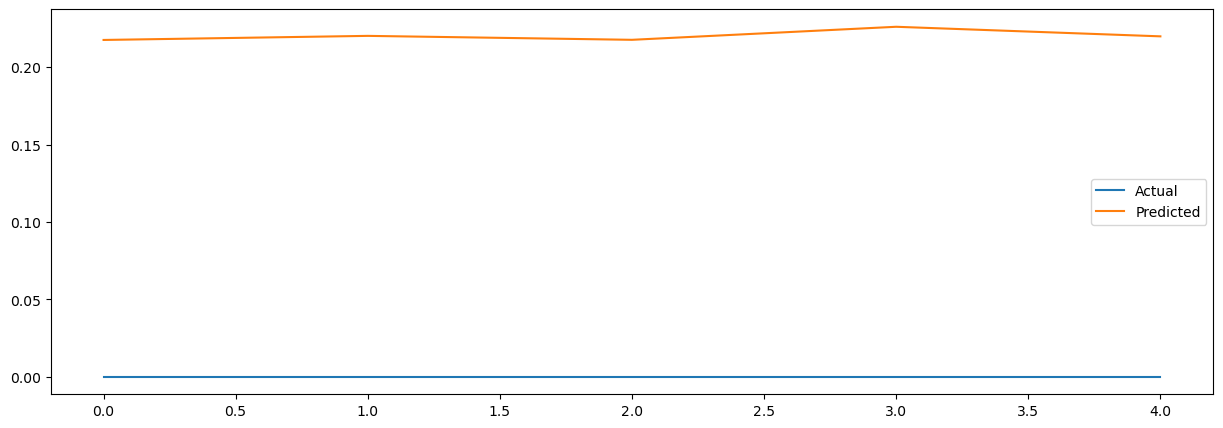

In [86]:
plt.plot(tes[:5], label = 'Actual')
plt.plot(fp[:5], label = 'Predicted')
plt.legend()
plt.show()